This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [ ]:
!pip install keras keras-hub --upgrade -q

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [ ]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## A deep dive on Keras

### A spectrum of workflows

### Different ways to build Keras models

Keras API'nin tasarımı , karmaşıklığın aşamalı olarak açıklanması ilkesine dayanır : Başlamayı kolaylaştırırken, aynı zamanda yüksek karmaşıklıktaki kullanım durumlarının üstesinden gelmeyi mümkün kılar ve her adımda yalnızca kademeli öğrenme gerektirir. Basit kullanım durumları kolay ve anlaşılır olmalı ve keyfi olarak gelişmiş iş akışları mümkün olmalıdır : Yapmak istediğiniz şey ne kadar niş ve karmaşık olursa olsun, ona giden net bir yol, daha basit iş akışlarından öğrendiğiniz çeşitli şeyleri temel alan bir yol olmalıdır. Bu, yeni başlayan seviyesinden uzman seviyesine yükselebileceğiniz ve aynı araçları kullanmaya devam edebileceğiniz anlamına gelir; yalnızca farklı şekillerde.

Bu nedenle, Keras'ı kullanmanın tek bir "gerçek" yolu yoktur. Keras, en basitinden en esnekine kadar bir iş akışı yelpazesi sunar. Keras modelleri oluşturmanın ve onları eğitmenin farklı yolları vardır ve bu da farklı ihtiyaçlara yanıt verir.

Örneğin, modeller oluşturmanın ve eğitmenin çeşitli yolları vardır ve bunların her biri, kullanılabilirlik ve esneklik arasında belirli bir dengeyi temsil eder. Keras'ı, scikit-learn'ü kullandığınız gibi kullanabilirsiniz; yani sadece çağırıp fit() çerçevenin işini yapmasına izin verebilirsiniz veya NumPy gibi kullanabilirsiniz; yani her küçük ayrıntının tam kontrolünü elinize alabilirsiniz.

LayerTüm bu iş akışları, ve gibi paylaşımlı API'lere dayandığından Model, herhangi bir iş akışındaki bileşenler başka herhangi bir iş akışında kullanılabilir: birbirleriyle iletişim kurabilirler. Bu, başlangıçta öğrendiğiniz her şeyin, uzman olduğunuzda da geçerli olacağı anlamına gelir. Kolayca başlayabilir ve ardından giderek daha fazla mantığı sıfırdan yazdığınız iş akışlarına kademeli olarak dalabilirsiniz. Öğrenciden araştırmacıya veya veri bilimcisinden derin öğrenme mühendisine dönüşürken tamamen farklı bir çerçeveye geçmeniz gerekmeyecek.

**Keras modelleri oluşturmanın farklı yolları**

Şekil 7.1'de gösterildiği gibi Keras'ta model oluşturmak için üç API vardır:

**Sıralı model , en kolay erişilebilir API'dir; temelde bir Python listesidir. Bu nedenle, basit katman yığınlarıyla sınırlıdır.

**Grafik benzeri model mimarilerine odaklanan Fonksiyonel API . Kullanılabilirlik ve esneklik arasında güzel bir orta noktayı temsil eder ve bu nedenle en yaygın kullanılan model oluşturma API'sidir.

**Model alt sınıflandırması , her şeyi sıfırdan kendiniz yazdığınız düşük seviyeli bir seçenektir. Her şey üzerinde tam kontrole sahip olmak istiyorsanız bu idealdir. Ancak, birçok yerleşik Keras özelliğine erişemezsiniz ve hata yapma riskiniz daha yüksek olur.

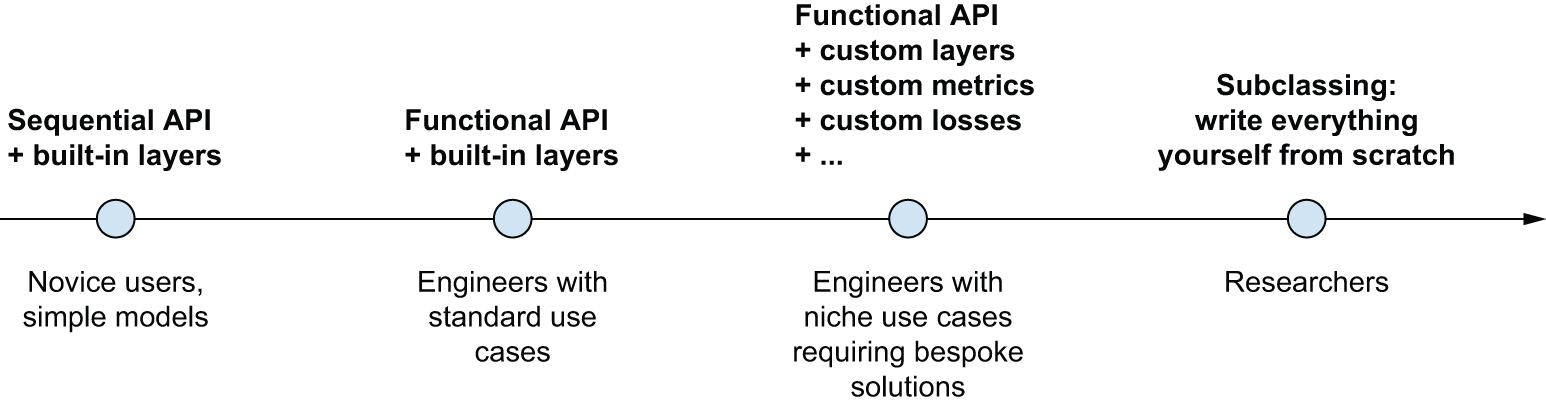

Şekil 7.1 : Model oluşturma için karmaşıklığın aşamalı olarak açıklanması

#### The Sequential model

In [ ]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

Aynı modeli, Python listelerindeki metoda add() benzer şekilde, artımlı olarak da inşa etmenin mümkün olduğunu unutmayın .append()

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

Katmanların yalnızca ilk kez çağrıldıklarında oluşturulduğunu (yani ağırlıklarını oluşturduğunu) görmüştük. Bunun nedeni, katmanların ağırlıklarının şeklinin girdilerinin şekline bağlı olmasıdır: girdi şekli bilinene kadar katmanlar oluşturulamaz.

Bu nedenle, önceki Sequential model, onu bazı veriler üzerinde çağırana veya build() yöntemini bir giriş şekliyle çağırana kadar herhangi bir ağırlığa sahip değildir.

In [ ]:
model.weights

In [ ]:
model.build(input_shape=(None, 3))
model.weights

summary() Model oluşturulduktan sonra, hata ayıklamada işinize yarayacak olan yöntemle içeriğini görüntüleyebilirsiniz .

In [ ]:
model.summary(line_length=80)

Gördüğünüz gibi, modelinizin adı sequential_1. Aslında Keras'ta her şeye, her modele, her katmana isim verebilirsiniz.

In [ ]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary(line_length=80)

Bir modeli artımlı olarak oluştururken Sequential, her katmanı ekledikten sonra mevcut modelin nasıl göründüğüne dair bir özet yazdırabilmek faydalıdır. Ancak model oluşturulana kadar bir özet yazdıramazsınız! Aslında modelinizin Sequentialanında oluşturulmasını sağlamanın bir yolu var: modelin girdilerinin şeklini önceden belirtmeniz yeterli. Bunu Input sınıf aracılığıyla yapabilirsiniz.

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

summary() Artık modelinize daha fazla katman ekledikçe çıktı şeklinin nasıl değiştiğini takip etmek için şunu kullanabilirsiniz :

In [ ]:
model.summary(line_length=80)

In [ ]:
model.add(layers.Dense(10, activation="softmax"))
model.summary(line_length=80)

Bu, girdilerini karmaşık şekillerde dönüştüren katmanlarla uğraşırken oldukça yaygın bir hata ayıklama iş akışıdır.

#### The Functional API

Modelin Sequential kullanımı kolaydır, ancak uygulanabilirliği son derece sınırlıdır: yalnızca tek bir girdi ve tek bir çıktı içeren modelleri ifade edebilir ve katmanları ardışık bir şekilde uygulayabilir. Pratikte, birden fazla girdiye (örneğin, bir görüntü ve meta verileri), birden fazla çıktıya (veriler hakkında tahmin etmek istediğiniz farklı şeyler) veya doğrusal olmayan bir topolojiye sahip modellerle karşılaşmak oldukça yaygındır.

Bu gibi durumlarda, modelinizi Fonksiyonel API kullanarak oluşturursunuz. Doğada karşılaşacağınız çoğu Keras modeli bunu kullanır. Eğlenceli ve güçlüdür; sanki LEGO parçalarıyla oynuyormuşsunuz gibi hissettirir.

##### A simple example

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs, name="my_functional_model")

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")

Bu nesne , modelin işleyeceği verilerin inputs şekli ve içeriği hakkında bilgi tutar :dtype

In [ ]:
inputs.shape

In [ ]:
inputs.dtype

Bu tür nesnelere sembolik tensör adını veriyoruz . Herhangi bir gerçek veri içermez, ancak modelin kullanıldığında göreceği gerçek veri tensörlerinin özelliklerini kodlar. " Gelecekteki veri tensörleri" anlamına gelir .

Daha sonra bir katman oluşturduk ve bunu girdiye çağırdık:

In [ ]:
features = layers.Dense(64, activation="relu")(inputs)

Tüm Keras katmanları, hem gerçek veri tensörleri hem de bu sembolik tensörler üzerinde çağrılabilir. İkinci durumda, güncellenmiş şekil ve veri türü bilgileriyle yeni bir sembolik tensör döndürürler:

In [ ]:
features.shape

Son çıktıları elde ettikten sonra, kurucuda girdilerini ve çıktılarını belirterek modeli örneklendirdik Model:

In [ ]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs, name="my_functional_model")

Modelimizin özeti şu şekilde:

In [ ]:
model.summary(line_length=80)

##### Multi-input, multi-output models

Bu oyuncak modelin aksine, çoğu derin öğrenme modeli listelere değil, grafiklere benzer. Örneğin, birden fazla girdi veya çıktıya sahip olabilirler. Fonksiyonel API'nin gerçekten öne çıktığı model tam da budur.

Müşteri destek taleplerini öncelik sırasına göre sıralayıp ilgili departmana yönlendiren bir sistem oluşturduğunuzu varsayalım. Modelinizin üç girdisi var:

**Biletin başlığı (metin girişi)

**Biletin metin gövdesi (metin girişi)

**Kullanıcı tarafından eklenen herhangi bir etiket (kategorik giriş, burada çoklu sıcak kodlanmış olduğu varsayılır)

Metin girdilerini 1'ler ve 0'lardan oluşan diziler olarak kodlayabiliriz vocabulary_size (metin kodlama teknikleri hakkında ayrıntılı bilgi için 14. bölüme bakın).

Modelinizin ayrıca iki çıkışı var:

**Biletin öncelik puanı, 0 ile 1 arasında bir skaler (sigmoid çıktı)

**Bileti işlemesi gereken departman (departmanlar kümesi üzerinde bir softmax)

Bu modeli Functional API ile birkaç satırda inşa edebilirsiniz.

In [ ]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu", name="dense_features")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department"
)(features)

model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department],
)

##### Training a multi-input, multi-output model

Modelinizi, tıpkı bir Sequential modeli eğittiğiniz gibi, giriş ve çıkış veri listeleriyle çağırarak eğitebilirsiniz fit(). Bu veri listeleri, oluşturucuya ilettiğiniz girdilerle aynı sırayı korumalıdır Model().

In [ ]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, num_departments, size=(num_samples, 1))

model.compile(
    optimizer="adam",
    loss=["mean_squared_error", "sparse_categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)
model.fit(
    [title_data, text_body_data, tags_data],
    [priority_data, department_data],
    epochs=1,
)
model.evaluate(
    [title_data, text_body_data, tags_data], [priority_data, department_data]
)
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

Input Eğer girdi sırasına güvenmek istemiyorsanız (örneğin, çok sayıda girdiniz veya çıktınız varsa), nesnelere ve çıktı katmanlarına verdiğiniz isimleri kullanabilir ve sözlükler aracılığıyla veri aktarabilirsiniz.

In [ ]:
model.compile(
    optimizer="adam",
    loss={
        "priority": "mean_squared_error",
        "department": "sparse_categorical_crossentropy",
    },
    metrics={
        "priority": ["mean_absolute_error"],
        "department": ["accuracy"],
    },
)
model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
    epochs=1,
)
model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
)
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

##### The power of the Functional API: Access to layer connectivity

Fonksiyonel model, açık bir grafik veri yapısıdır. Bu, katmanların nasıl bağlandığını incelemeyi ve önceki grafik düğümlerini (katman çıktıları) yeni modellerin bir parçası olarak yeniden kullanmayı mümkün kılar. Ayrıca, çoğu araştırmacının derin bir sinir ağı düşünürken kullandığı "zihinsel modele", yani katmanlardan oluşan bir grafiğe de mükemmel bir şekilde uyar.

Bu, iki önemli kullanım örneğini mümkün kılar: model görselleştirme ve özellik çıkarma. Gelin bir göz atalım.

###### Plotting layer connectivity

Az önce tanımladığımız modelin bağlantısını ( modelin topolojisiniplot_model() ) görselleştirelim.

In [ ]:
keras.utils.plot_model(model, "ticket_classifier.png")

Bu grafiğe, modeldeki her katmanın giriş ve çıkış şekillerini ve katman türlerini değil, katman adlarını da ekleyebilirsiniz; bu, hata ayıklama sırasında faydalı olabilir (Şekil 7.3):

In [ ]:
keras.utils.plot_model(
    model,
    "ticket_classifier_with_shape_info.png",
    show_shapes=True,
    show_layer_names=True,
)

###### Feature extraction with a Functional model

Katman bağlantısına erişim, grafikteki tek tek düğümleri (katman çağrıları) inceleyip yeniden kullanabileceğiniz anlamına da gelir. Model özelliği model.layers , modeli oluşturan katmanların listesini sağlar ve her katman için sorgu layer.input ve layer.output.

In [ ]:
model.layers

In [ ]:
model.layers[3].input

In [ ]:
model.layers[3].output

Bu , özellik çıkarma işlemini yapmanızı sağlar : başka bir modelden ara özellikleri yeniden kullanan modeller oluşturma.

Diyelim ki daha önce tanımladığımız modele başka bir çıktı eklemek istiyorsunuz; ayrıca, belirli bir sorun biletinin çözümünün ne kadar süreceğine dair bir tahmin de yapmak istiyorsunuz; bu bir tür zorluk derecesidir. Bunu, "hızlı", "orta" ve "zor" olmak üzere üç kategoriye ayrılmış bir sınıflandırma katmanı aracılığıyla yapabilirsiniz. Bir modeli sıfırdan yeniden oluşturup eğitmenize gerek yok! Önceki modelinizin ara özelliklerine erişiminiz olduğu için, bunlardan başlayabilirsiniz.

In [ ]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags], outputs=[priority, department, difficulty]
)

In [ ]:
keras.utils.plot_model(
    new_model,
    "updated_ticket_classifier.png",
    show_shapes=True,
    show_layer_names=True,
)

#### Subclassing the Model class

Bilmeniz gereken son model oluşturma modeli, en gelişmiş olanı: alt sınıflandırma. 3. bölümde , özel katmanlar oluşturmak için sınıfı Model nasıl alt sınıflara ayıracağınızı öğrendiniz . Alt sınıflandırma oldukça benzerdir:LayerModel

**Yöntemde __init__, modelin kullanacağı katmanları tanımlayın.

**Yöntemde call, daha önce oluşturulan katmanları yeniden kullanarak modelin ileri geçişini tanımlayın.

**Alt sınıfınızı örnekleyin ve ağırlıklarını oluşturmak için onu verilerde çağırın.

##### Rewriting our previous example as a subclassed model

Basit bir örneğe bakalım: Müşteri destek bileti yönetim modelini bir Model alt sınıf kullanarak yeniden uygulayacağız.

In [ ]:
class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax"
        )

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

Modeli tanımladıktan sonra, onu örnekleyebilirsiniz. Ağırlıklarını yalnızca bazı veriler üzerinde ilk kez çağırdığınızda oluşturacağını unutmayın; tıpkı Layer alt sınıflar gibi:

In [ ]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

Layer Şimdiye kadar her şey, 3. bölümde karşılaştığınız bir iş akışı olan alt sınıflandırmaya çok benziyor . Peki, Layer alt sınıf ile Model alt sınıf arasındaki fark nedir? Çok basit: Katman , modeller oluşturmak için kullandığınız bir yapı taşıdır ve model , aslında eğiteceğiniz, çıkarım için dışa aktaracağınız vb. en üst düzey nesnedir. Kısacası, a'nın , , ve metodu Model vardır . Katmanların yoktur. Bunun dışında, iki sınıf neredeyse aynıdır (bir diğer fark da, modeli diskteki bir dosyaya kaydedebilmenizdir ; bunu birkaç bölümde ele alacağız).fit() evaluate() predict()

Model Bir alt sınıfı tıpkı Sıralı veya Fonksiyonel bir model gibi derleyebilir ve eğitebilirsiniz :

In [ ]:
model.compile(
    optimizer="adam",
    loss=["mean_squared_error", "sparse_categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)
model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    [priority_data, department_data],
    epochs=1,
)
model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    [priority_data, department_data],
)
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

Alt Model sınıflandırma iş akışı, bir model oluşturmanın en esnek yoludur: Katmanların yönlendirilmiş döngüsüz grafikleri olarak ifade edilemeyen modeller oluşturmanıza olanak tanır; örneğin, yöntemin call()katmanları bir for döngü içinde kullandığı, hatta onları yinelemeli olarak çağırdığı bir model düşünün. Her şey mümkün; kontrol sizde.

##### Beware: What subclassed models don't support

Bu özgürlüğün bir bedeli var: Alt sınıf modellerle, model mantığının daha büyük bir kısmından sorumlu olursunuz, bu da potansiyel hata yüzeyinizin çok daha büyük olduğu anlamına gelir. Sonuç olarak, daha fazla hata ayıklama işiniz olur. Sadece LEGO parçalarını bir araya getirmiyorsunuz, yeni bir Python nesnesi geliştiriyorsunuz.

İşlevsel ve alt sınıflı modeller de yapıları gereği önemli ölçüde farklıdır: İşlevsel model, görüntüleyebileceğiniz, inceleyebileceğiniz ve değiştirebileceğiniz katmanlardan oluşan bir grafik olan açık bir veri yapısıdır. Alt sınıflı model ise bir bayt kodu parçasıdır; call()ham kod içeren bir yönteme sahip bir Python sınıfıdır. Alt sınıflandırma iş akışının esnekliğinin kaynağı budur; istediğiniz işlevi kodlayabilirsiniz; ancak bu durum yeni sınırlamalar getirir.

Örneğin, katmanların birbirine bağlanma şekli yöntemin gövdesinin içinde gizli olduğundan call(), bu bilgilere erişemezsiniz. Çağrı, summary() katman bağlantısını görüntülemez ve model topolojisini plot_model(). ile çizemezsiniz. Benzer şekilde, alt sınıflandırılmış bir modeliniz varsa, özellik çıkarımı yapmak için katmanların grafiğinin düğümlerine erişemezsiniz; çünkü ortada bir grafik yoktur. Model örneklendikten sonra, ileri geçişi tamamen kara bir kutuya dönüşür.

#### Mixing and matching different components

En önemlisi, bu kalıplardan birini seçmek ( Sequential model, Fonksiyonel API, Modelalt sınıflandırma) sizi diğerlerinden mahrum bırakmaz. Keras API'sindeki tüm modeller, ister Sıralı modeller, ister Fonksiyonel modeller veya sıfırdan yazılmış alt sınıflandırılmış modeller olsun, birbirleriyle sorunsuz bir şekilde etkileşim kurabilir. Hepsi aynı iş akışı yelpazesinin bir parçasıdır. Örneğin, Fonksiyonel bir modelde alt sınıflandırılmış bir katman veya model kullanabilirsiniz.

In [ ]:
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

Tersine, bir Fonksiyonel modeli alt sınıflandırılmış bir katmanın veya modelin parçası olarak kullanabilirsiniz.

In [ ]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

#### Remember: Use the right tool for the job

Keras modelleri oluşturmak için en basit iş akışından (model) en gelişmiş iş akışı olan model alt sınıflandırmasına kadar çeşitli iş akışı seçeneklerini öğrendiniz  Sequential. Hangisini diğerine tercih etmelisiniz? Her birinin kendine göre avantajları ve dezavantajları vardır; elinizdeki işe en uygun olanı seçin.

Genel olarak, Fonksiyonel API, kullanım kolaylığı ve esneklik arasında oldukça iyi bir denge sağlar. Ayrıca, model çizimi veya özellik çıkarımı gibi kullanım durumları için çok güçlü olan katman bağlantısına doğrudan erişim sağlar. Fonksiyonel API'yi kullanabiliyorsanız , yani modeliniz katmanlardan oluşan yönlendirilmiş, döngüsüz bir grafik olarak ifade edilebiliyorsa, model alt sınıflandırması yerine onu kullanmanızı öneririz.

Bundan sonra, bu kitaptaki tüm örnekler Fonksiyonel API'yi kullanacaktır; çünkü üzerinde çalışacağımız tüm modeller katman grafikleri olarak ifade edilebilir. Ancak, alt sınıflara ayrılmış katmanları sıklıkla kullanacağız. Genel olarak, alt sınıflara ayrılmış katmanlar içeren Fonksiyonel modeller kullanmak, her iki dünyanın da en iyisini sağlar: Fonksiyonel API'nin avantajlarını korurken yüksek geliştirme esnekliği.

### Using built-in training and evaluation loops

Karmaşıklığın aşamalı olarak açıklanması ilkesi (son derece kolaydan keyfi olarak esnekliğe adım adım ilerleyen bir iş akışı yelpazesine erişim), model eğitimi için de geçerlidir. Keras, model eğitimi için farklı iş akışları sunar; fit() verilerinizi kullanmak kadar basit veya sıfırdan yeni bir eğitim algoritması yazmak kadar gelişmiş olabilir.

compile(), fit(), evaluate(), iş akışına zaten aşinasınız predict() . Hatırlatmak gerekirse, aşağıdaki listeye benziyor.

In [ ]:
from keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images,
    train_labels,
    epochs=3,
    validation_data=(val_images, val_labels),
)
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Bu basit iş akışını özelleştirmenin birkaç yolu vardır:

Kendi özel ölçümlerinizi sağlayarak
Eğitim sırasında belirli noktalarda gerçekleştirilecek eylemleri planlamak için yönteme geri aramalar göndererek  fit()
Bunlara bir bakalım.

#### Writing your own metrics

Metrikler, modelinizin performansını ölçmede, özellikle de eğitim verilerindeki performansı ile test verilerindeki performansı arasındaki farkı ölçmede çok önemlidir. Sınıflandırma ve regresyon için yaygın olarak kullanılan metrikler zaten yerleşik modülün bir parçasıdır keras.metrics; çoğu zaman siz de bunları kullanırsınız. Ancak sıra dışı bir şey yapıyorsanız, kendi metriklerinizi yazabilmeniz gerekir. Çok basit!

Keras metriği, sınıfın bir alt sınıfıdır keras.metrics.Metric. Katmanlara benzer şekilde, bir metriğin de Keras değişkenlerinde depolanan dahili bir durumu vardır. Katmanların aksine, bu değişkenler geri yayılım yoluyla güncellenmez, bu nedenle durum güncelleme mantığını kendiniz yazmanız gerekir; bu da yöntemde gerçekleşir update_state(). Örneğin, aşağıda kök ortalama karesel hatayı (RMSE) ölçen basit bir özel metrik bulunmaktadır.

Bu arada, metrik durumunu yeniden örneklemeye gerek kalmadan sıfırlamanın bir yolunu da ortaya çıkarmanız gerekiyor. Bu, aynı metrik nesnelerinin farklı eğitim dönemlerinde veya hem eğitim hem de değerlendirmede kullanılmasını sağlar. Bunu şu yöntemde yaparsınız reset_state():

In [ ]:
from keras import ops

class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros"
        )

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = ops.one_hot(y_true, num_classes=ops.shape(y_pred)[1])
        mse = ops.sum(ops.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = ops.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return ops.sqrt(self.mse_sum / self.total_samples)

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0.)

Özel metrikler, yerleşik metrikler gibi kullanılabilir. Kendi metriklerimizi test edelim:

In [ ]:
model = get_mnist_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", RootMeanSquaredError()],
)
model.fit(
    train_images,
    train_labels,
    epochs=3,
    validation_data=(val_images, val_labels),
)
test_metrics = model.evaluate(test_images, test_labels)

#### Using callbacks

Onlarca dönem boyunca büyük bir veri kümesi üzerinde bir eğitim çalışması başlatmak, model.fit() bir kağıt uçağı fırlatmaya benzeyebilir: ilk itme kuvvetinden sonra, yörüngesi veya iniş noktası üzerinde hiçbir kontrolünüz olmaz. Kötü sonuçlardan (ve dolayısıyla boşa giden kağıt uçaklardan) kaçınmak istiyorsanız, bir kağıt uçak yerine, çevresini algılayabilen, operatörüne veri gönderebilen ve mevcut durumuna göre otomatik olarak yönlendirme kararları verebilen bir drone kullanmak daha akıllıcadır. Keras geri arama API'si, çağrınızı model.fit() bir kağıt uçaktan, kendi kendini gözlemleyebilen ve dinamik olarak harekete geçebilen akıllı ve otonom bir drone'a dönüştürmenize yardımcı olacaktır.

Geri arama , modele çağrıda iletilen fit()ve eğitim sırasında çeşitli noktalarda model tarafından çağrılan bir nesnedir (belirli yöntemleri uygulayan bir sınıf örneği). Modelin durumu ve performansı hakkında mevcut tüm verilere erişebilir ve eğitim sürecini kesintiye uğratmak, modeli kaydetmek, farklı bir ağırlık kümesi yüklemek veya modelin durumunu başka şekillerde değiştirmek gibi eylemlerde bulunabilir.

Geri aramaları kullanabileceğiniz bazı örnekler şunlardır:

**Model kontrol noktası oluşturma  — Eğitim sırasında farklı noktalarda modelin mevcut durumunun kaydedilmesi.

**Erken durdurma  — Doğrulama kaybı artık iyileşmediğinde eğitimi kesintiye uğratma (ve elbette eğitim sırasında elde edilen en iyi modeli kaydetme).

**Eğitim sırasında belirli parametrelerin değerinin dinamik olarak ayarlanması  — Optimizasyon aracının öğrenme hızı gibi.

**Eğitim sırasında eğitim ve doğrulama ölçümlerini kaydetmek veya model tarafından öğrenilen gösterimleri güncellendikçe görselleştirmek  — fit() Alışık olduğunuz ilerleme çubuğu aslında bir geri çağırmadır!
Modül, keras.callbacksbir dizi yerleşik geri aramayı içerir (bu kapsamlı bir liste değildir):


keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger

Bunlardan ikisini inceleyerek nasıl kullanılacağına dair bir fikir edinelim: EarlyStopping ve ModelCheckpoint.

##### The EarlyStopping and ModelCheckpoint callbacks

Bir modeli eğitirken, başlangıçta tahmin edemeyeceğiniz birçok şey vardır. Özellikle, optimum doğrulama kaybına ulaşmak için kaç döneme ihtiyaç duyulacağını bilemezsiniz. Şimdiye kadar ki örneklerimiz, aşırı uyum sağlamaya (overfitting) başladığınız, optimum dönem sayısını bulmak için ilk çalıştırmayı kullandığınız ve ardından bu optimum sayıyı kullanarak sıfırdan yeni bir eğitim çalıştırması başlattığınız yeterli sayıda dönem için eğitim stratejisini benimsedi. Elbette bu yaklaşım israftır. Bununla başa çıkmanın çok daha iyi bir yolu, doğrulama kaybının artık iyileşmediğini ölçtüğünüzde eğitimi durdurmaktır. Bu, EarlyStopping geri çağırma kullanılarak gerçekleştirilebilir.

Geri EarlyStoppingarama, izlenen bir hedef metrik belirli bir dönem boyunca iyileşmeyi durdurduğunda eğitimi kesintiye uğratır. Örneğin, bu geri arama, aşırı uyum sağlamaya başladığınız anda eğitimi kesintiye uğratmanıza olanak tanır ve böylece modelinizi daha kısa bir dönem sayısı için yeniden eğitmek zorunda kalmazsınız. Bu geri arama genellikle ModelCheckpoint, eğitim sırasında modeli sürekli olarak kaydetmenize (ve isteğe bağlı olarak yalnızca o ana kadarki en iyi modeli, yani bir dönemin sonunda en iyi performansı elde eden model sürümünü kaydetmenize) olanak tanıyan ile birlikte kullanılır.

In [ ]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="accuracy",
        patience=1,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    ),
]
model = get_mnist_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    callbacks=callbacks_list,
    validation_data=(val_images, val_labels),
)

Eğitimden sonra modelleri manuel olarak da kaydedebileceğinizi unutmayın; sadece 'i çağırın model.save("my_checkpoint_path.keras"). Kaydettiğiniz modeli yeniden yüklemek için şunu kullanın:

In [ ]:
model = keras.models.load_model("checkpoint_path.keras")

#### Writing your own callbacks

Eğitim sırasında yerleşik geri aramalardan biri tarafından kapsanmayan belirli bir eylem gerçekleştirmeniz gerekiyorsa, kendi geri aramanızı yazabilirsiniz. Geri aramalar, sınıfın alt sınıflara ayrılmasıyla uygulanır keras.callbacks.Callback. Ardından, eğitim sırasında çeşitli noktalarda çağrılan aşağıdaki şeffaf adlandırılmış yöntemlerden istediğiniz kadarını uygulayabilirsiniz:


**Called at the start of every epoch

on_epoch_begin(epoch, logs)

**Called at the end of every epoch

on_epoch_end(epoch, logs)

**Called right before processing each batch

on_batch_begin(batch, logs)

**Called right after processing each batch

on_batch_end(batch, logs)

**Called at the start of training

on_train_begin(logs)

**Called at the end of training

on_train_end(logs)


Bu yöntemlerin tümü, önceki toplu iş, dönem veya eğitim çalışması hakkında bilgi içeren bir sözlük olan bir bağımsız değişkenle çağrılır logs: eğitim ve doğrulama metrikleri vb. on_epoch_*ve on_batch_* yöntemleri de ilk bağımsız değişken olarak dönem veya toplu iş dizinini (bir tam sayı) alır.

İşte eğitim sırasında toplu kayıp değerlerinin bir listesini kaydeden ve bu değerleri her dönemin sonunda çizen basit bir geri arama örneği.

In [ ]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(
            range(len(self.per_batch_losses)),
            self.per_batch_losses,
            label="Training loss for each batch",
        )
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}", dpi=300)
        self.per_batch_losses = []

In [ ]:
model = get_mnist_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    callbacks=[LossHistory()],
    validation_data=(val_images, val_labels),
)

#### Monitoring and visualization with TensorBoard

İyi bir araştırma yapmak veya iyi modeller geliştirmek için, deneyleriniz sırasında modellerinizin içinde neler olup bittiği hakkında zengin ve sık geri bildirimlere ihtiyacınız vardır. Deneyleri çalıştırmanın amacı da budur: Bir modelin ne kadar iyi performans gösterdiği hakkında mümkün olduğunca fazla bilgi edinmek. İlerleme kaydetmek yinelemeli bir süreçtir, bir döngüdür: Bir fikirle başlar ve bunu bir deney olarak ifade ederek fikrinizi doğrulamaya veya geçersiz kılmaya çalışırsınız. Bu deneyi çalıştırır ve Şekil 7.6'da gösterildiği gibi ürettiği bilgileri işlersiniz. Bu, bir sonraki fikrinize ilham verir. Bu döngünün ne kadar çok yinelemesini çalıştırabilirseniz, fikirleriniz o kadar rafine ve güçlü hale gelir. Keras, mümkün olan en kısa sürede fikirden deneye geçmenize yardımcı olur ve hızlı GPU'lar deneyden sonuca mümkün olan en kısa sürede ulaşmanıza yardımcı olabilir. Peki ya deney sonuçlarını işleme? İşte TensorBoard tam da bu noktada devreye giriyor.

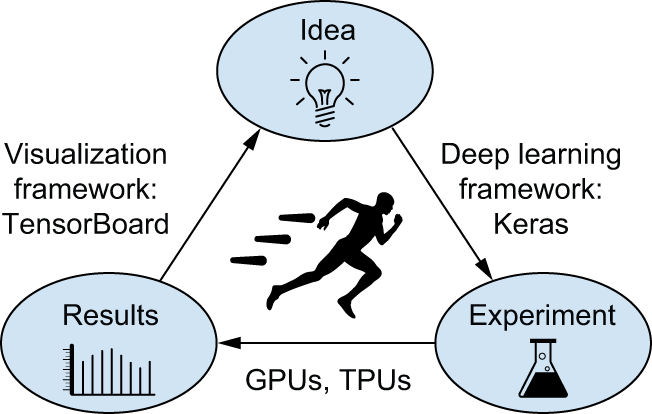

TensorBoard, yerel olarak çalıştırabileceğiniz tarayıcı tabanlı bir uygulamadır. Eğitim sırasında modelinizin içinde olup biten her şeyi izlemenin en iyi yoludur. TensorBoard ile şunları yapabilirsiniz:

**Eğitim sırasında ölçümleri görsel olarak izleyin

**Model mimarinizi görselleştirin

**Aktivasyonların ve gradyanların histogramlarını görselleştirin

**3B'de yerleştirmeleri keşfedin

Modelin nihai kaybından daha fazla bilgiyi izliyorsanız, modelin ne yapıp ne yapmadığı konusunda daha net bir görüş geliştirebilir ve daha hızlı ilerleme kaydedebilirsiniz.

fit() TensorBoard'u bir Keras modeli ve yöntemiyle kullanmanın en kolay yolu keras.callbacks.TensorBoard geri aramadır. En basit durumda, geri aramanın günlükleri nereye yazmasını istediğinizi belirtmeniz yeterlidir; hazırsınız:

In [ ]:
model = get_mnist_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard],
)

Model çalışmaya başladığında, hedef konuma günlükler yazacaktır. Python betiğinizi yerel bir bilgisayarda çalıştırıyorsanız, aşağıdaki komutu kullanarak yerel TensorBoard sunucusunu başlatabilirsiniz ( tensorboard TensorFlow'u ile yüklediyseniz yürütülebilir dosyanın zaten mevcut olması gerektiğini unutmayın pip; değilse, TensorBoard'u ile manuel olarak yükleyebilirsiniz pip install tensorboard):

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

Daha sonra komutun döndürdüğü URL'ye giderek TensorBoard arayüzüne erişebilirsiniz.

Betiğinizi bir Colab not defterinde çalıştırıyorsanız, aşağıdaki komutları kullanarak not defterinizin bir parçası olarak gömülü bir TensorBoard örneğini çalıştırabilirsiniz:

### Writing your own training and evaluation loops

İş fit() akışı, kullanım kolaylığı ve esneklik arasında güzel bir denge kuruyor. Çoğu zaman kullanacağınız şey bu. Ancak, derin öğrenme araştırmacılarının yapmak isteyebileceği her şeyi —özel ölçümler, özel kayıplar ve özel geri aramalar olsa bile— desteklemesi amaçlanmamıştır.

Sonuçta, yerleşik iş akışı yalnızca denetlenen öğrenmeye fit() odaklanır : giriş verilerinizle ilişkili bilinen hedeflerin ( etiketler veya açıklamalar olarak da adlandırılır ) bulunduğu ve kaybınızı bu hedeflere ve modelin tahminlerine göre hesapladığınız bir kurulum. Ancak, makine öğreniminin her biçimi bu kategoriye girmez. Açık hedeflerin bulunmadığı başka kurulumlar da vardır, örneğin üretken öğrenme , öz-denetimli öğrenme (hedeflerin girdilerden elde edildiği) veya takviyeli öğrenme (öğrenmenin ara sıra verilen "ödüllerle" yönlendirildiği - tıpkı bir köpeği eğitmek gibi). Düzenli olarak denetlenen öğrenme yapıyor olsanız bile, bir araştırmacı olarak, düşük düzeyde esneklik gerektiren bazı yeni özellikler eklemek isteyebilirsiniz.

Yerleşik mantığın yeterli olmadığı bir durumda fit(), kendi özel eğitim mantığınızı yazmanız gerekecektir. 2. ve 3. bölümlerde düşük seviyeli eğitim döngülerinin basit örneklerini zaten gördünüz. Hatırlatmak gerekirse, tipik bir eğitim döngüsünün içeriği şöyle görünür:

Mevcut veri grubu için bir kayıp değeri elde etmek amacıyla “ileri geçişi” çalıştırın (modelin çıktısını hesaplayın).
Modelin ağırlıklarına göre kaybın gradyanlarını alın.
Mevcut veri grubundaki kayıp değerini düşürmek için modelin ağırlıklarını güncelleyin.
Bu adımlar, gerektiği kadar çok sayıda grup için tekrarlanır. fit() Perde arkasında yapılan şey esasen budur. Bu bölümde, sıfırdan yeniden uygulama yapmayı öğreneceksiniz fit(); bu da size, geliştirebileceğiniz herhangi bir eğitim algoritmasını yazmak için ihtiyacınız olan tüm bilgiyi sağlayacaktır.

Ayrıntılara geçelim. Sonraki birkaç bölümde, TensorFlow, PyTorch ve JAX'ta tam özellikli özel bir eğitim döngüsü yazmaya doğru ilerleyeceksiniz.

#### Training vs. inference

Şimdiye kadar gördüğünüz düşük seviyeli eğitim döngüsü örneklerinde, 1. adım (ileri geçiş) aracılığıyla yapıldı predictions = model(inputs) ve 2. adım (gradyan bandı tarafından hesaplanan gradyanları alma) arka uç özel bir API aracılığıyla yapıldı, örneğin:

**gradients = tape.gradient(loss, model.weights) TensorFlow'da

**loss.backward() PyTorch'ta

**jax.value_and_grad() JAX'ta

Genel durumda aslında dikkate almanız gereken iki incelik var.

Bazı Keras katmanları, örneğin katman, eğitim sırasında ve çıkarım sırasında (tahmin üretmek için kullandığınızda) Dropout farklı davranışlar sergiler . Bu katmanlar , metotlarında bir Boole argümanı kullanır . Çağrı, bazı etkinleştirme girdilerini düşürürken, çağrı hiçbir şey yapmaz. Dolayısıyla, Fonksiyonel modeller ve Sıralı modeller de metotlarında bu argümanı kullanır . İleri geçiş sırasında bir Keras modelini çağırdığınızda geçiş yapmayı unutmayın! İleri geçişimiz bu nedenle olur .trainingcall() dropout(inputs, training=True) dropout(inputs, training=False) trainingcall() training=Truepredictions = model(inputs, training=True)

Ayrıca, modelinizin ağırlıklarının gradyanlarını alırken model.weights yerine kullanmanız gerektiğini unutmayın model.trainable_weights. Katmanlar ve modeller iki tür ağırlığa sahiptir:

**Bir katmanın çekirdeği ve eğilimi gibi modelin kaybını en aza indirmek için geri yayılım yoluyla güncellenmesi amaçlanan eğitilebilir ağırlıklar Dense .

**Eğitilemeyen ağırlıklar , bunlara sahip olan katmanlar tarafından ileri geçiş sırasında güncellenmesi amaçlanmıştır. Örneğin, özel bir katmanın bugüne kadar kaç toplu işlem işlediğini gösteren bir sayaç tutmasını isterseniz, bu bilgi eğitilemeyen bir ağırlıkta saklanır ve katmanınız her toplu işlemde sayacı bir artırır.

Keras'ın yerleşik katmanları arasında, eğitilemeyen ağırlıklara sahip tek katman BatchNormalization, 9. bölümde tanıtacağımız katmandır. Katman, BatchNormalization içinden geçen verilerin ortalaması ve standart sapması hakkındaki bilgileri izlemek için eğitilemeyen ağırlıklara ihtiyaç duyar; böylece özellik normalizasyonunun çevrimiçi bir yaklaşımını gerçekleştirir.

#### Writing custom training step functions

Bu iki ayrıntıyı hesaba kattığımızda, denetlenen öğrenme eğitimi adımı sözde kodda şu şekilde görünür:

def train_step(inputs, targets):

    **Runs the forward pass
    predictions = model(inputs, training=True)

    **Computes the loss for the current batch
    loss = loss_fn(targets, predictions)

    **Retrieves the gradients of the loss with regard to the model's
    **trainable weights This function doesn't actually exist!
    gradients = get_gradients_of(loss, wrt=model.trainable_weights)

    **Updates the model's trainable weights based on the gradients
    optimizer.apply(gradients, model.trainable_weights)
Bu kod parçası, hayali bir fonksiyon içerdiğinden gerçek koddan ziyade sözde koddur get_gradients_of(). Gerçekte, gradyanları alma işlemi mevcut arka ucunuza (JAX, TensorFlow veya PyTorch) özgü bir şekilde yapılır.

3.bölümde her bir framework hakkında öğrendiklerinizi kullanarak bu train_step() fonksiyonun gerçek bir versiyonunu uygulayalım. TensorFlow ve PyTorch ile başlayacağız çünkü bu ikisi işi nispeten kolaylaştırıyor ve başlamak için iyi bir yer. Biraz daha karmaşık olan JAX ile bitireceğiz.

##### A TensorFlow training step function

TensorFlow, sözde kod parçacığımıza oldukça benzeyen kodlar yazmanıza olanak tanır. Tek fark, ileri geçişinizin bir kapsam içinde gerçekleşmesi gerektiğidir . Daha sonra, gradyanları almak için nesneyi GradientTape kullanabilirsiniz :tape

In [ ]:
%%backend tensorflow
import tensorflow as tf

model = get_mnist_model()
loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply(gradients, model.trainable_weights)
    return loss

In [ ]:
%%backend tensorflow
batch_size = 32
inputs = train_images[:batch_size]
targets = train_labels[:batch_size]
loss = train_step(inputs, targets)

##### A PyTorch training step function

PyTorch arka ucunu kullandığınızda, tüm Keras katmanlarınız ve modelleriniz PyTorch sınıfından miras alır torch.nn.Module ve yerel ModuleAPI'yi kullanıma sunar. Sonuç olarak, modeliniz, eğitilebilir ağırlıkları ve kayıp tensörünüz birbirinin farkındadır ve üç yöntem aracılığıyla etkileşime girer: loss.backward(), weight.value.grad, ve model.zero_grad().

3.bölümden hatırlayacağınız gibi, aklınızda tutmanız gereken zihinsel model şudur:

**Her ileri pasla birlikte PyTorch, az önce gerçekleşen hesaplamayı takip eden tek seferlik bir hesaplama grafiği oluşturur.

**.backward() Bu grafiğin herhangi bir skaler düğümünü (örneğin kaybınızı) çağırmak , grafiği o düğümden başlayarak geriye doğru çalıştıracak ve tensor.grad ilgili tüm tensörlere (eğer sağlıyorlarsa) otomatik olarak bir öznitelik dolduracaktır. Bu öznitelik, çıkış düğümünün o tensöre göre eğimini içerecektir. Özellikle, eğitilebilir parametrelerinizin özniteliğini requires_grad=True dolduracaktır .grad

**Bu özniteliğin içeriğini temizlemek için tüm tensörlerinizi tensor.grad çağırmalısınız . Bunu tüm model değişkenleri üzerinde ayrı ayrı yapmak biraz zahmetli olacağından, bunu model düzeyinde via ile yapabilirsiniz ; çağrı, model tarafından izlenen tüm değişkenlere yayılır. Gradyanları temizlemek kritik öneme sahiptir çünkü to çağrıları toplamaya yöneliktir: Her adımda gradyanları temizlemezseniz, gradyan değerleri birikir ve eğitim devam etmez. tensor.grad = Nonemodel.zero_grad() zero_grad() backward()
Şu adımları zincirleyelim:

In [ ]:
%%backend torch
import torch

model = get_mnist_model()
loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam()

def train_step(inputs, targets):
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
    loss.backward()
    gradients = [weight.value.grad for weight in model.trainable_weights]
    with torch.no_grad():
        optimizer.apply(gradients, model.trainable_weights)
    model.zero_grad()
    return loss

In [ ]:
%%backend torch
batch_size = 32
inputs = train_images[:batch_size]
targets = train_labels[:batch_size]
loss = train_step(inputs, targets)

##### A JAX training step function

Düşük seviyeli eğitim kodu söz konusu olduğunda, JAX tamamen durumsuz yapısı nedeniyle üç arka uç arasında en karmaşık olanıdır. Durumsuzluk, JAX'ı yüksek performanslı ve ölçeklenebilir kılarak derlemeye ve otomatik performans optimizasyonlarına uygun hale getirir. Ancak, durumsuz kod yazmak bazı engelleri aşmanızı gerektirir.

Gradyan fonksiyonu metaprogramlama yoluyla elde edildiğinden, öncelikle kaybınızı döndüren fonksiyonu tanımlamanız gerekir. Ayrıca, bu fonksiyonun durumsuz olması gerekir, yani kullanacağı tüm değişkenleri argüman olarak alması ve güncellediği tüm değişkenlerin değerini döndürmesi gerekir. İleri geçiş sırasında değiştirilebilen eğitilemeyen ağırlıkları hatırlıyor musunuz? İşte döndürmemiz gereken değişkenler bunlar.

JAX'ın durumsuz programlama paradigmasıyla çalışmayı kolaylaştırmak için Keras modelleri, durumsuz bir ileri geçiş yöntemi sunar: stateless_call() yöntem. Tıpkı gibi davranır __call__, ancak şu farkla:

**Modelin eğitilebilir ağırlıkları ve eğitilemeyen ağırlıklarını ve bunlara ek olarak argümanlarını girdi olarak inputs alır training.

**Modelin çıktılarına ek olarak, modelin güncellenmiş eğitilemeyen ağırlıklarını döndürür.

Bu şöyle çalışır:

outputs, non_trainable_weights = model.stateless_call(

    trainable_weights,
    non_trainable_weights, inputs
)

JAX kayıp fonksiyonumuzu uygulamak için kullanabiliriz stateless_call(). Kayıp fonksiyonu aynı zamanda eğitilemeyen tüm değişkenler için güncellemeleri de hesapladığından, ona şu ismi veriyoruz compute_loss_and_updates():

In [ ]:
%%backend jax
model = get_mnist_model()
loss_fn = keras.losses.SparseCategoricalCrossentropy()

def compute_loss_and_updates(
    trainable_variables, non_trainable_variables, inputs, targets
):
    outputs, non_trainable_variables = model.stateless_call(
        trainable_variables, non_trainable_variables, inputs, training=True
    )
    loss = loss_fn(targets, outputs)
    return loss, non_trainable_variables

Bu fonksiyona sahip olduğumuzda , gradyan hesaplamasını elde etmek için compute_loss_and_updates() bunu şu fonksiyona geçirebiliriz :jax.value_and_grad

In [ ]:
%%backend jax
import jax

grad_fn = jax.value_and_grad(compute_loss_and_updates, has_aux=True)

Şimdi, küçük bir sorun var. Hem jax.grad() hem de'nin yalnızca skaler bir değer döndürmesi jax.value_and_grad() gerekiyor . Fonksiyonumuz ilk çıktı olarak skaler bir değer döndürüyor, ancak aynı zamanda eğitilemeyen ağırlıklar için yeni değeri de döndürüyor. 3. bölümde öğrendiklerinizi hatırlıyor musunuz? Çözüm, or'a şu şekilde bir argüman geçirmek :fncompute_loss_and_updates() has_auxgrad() value_and_grad()

import jax

grad_fn = jax.value_and_grad(compute_loss_and_updates, has_aux=True)

Bunu şu şekilde kullanabilirsiniz:

(loss, non_trainable_weights), gradients = grad_fn(
    trainable_variab
    les, non_trainable_variables, inputs, targets
)


Tamam, bu oldukça fazla JAX'lıktı. Ama şimdi JAX eğitim adımımızı bir araya getirmek için ihtiyacımız olan neredeyse her şeye sahibiz. Sadece bulmacanın son parçasına ihtiyacımız var: optimizer.apply().


Bölüm 2'nin başında TensorFlow'da ilk temel eğitim adımınızı yazdığınızda, aşağıdaki gibi görünen bir güncelleme adımı fonksiyonu yazdınız:

learning_rate = 1e-3


def update_weights(gradients, weights):

    for g, w in zip(gradients, weights):

        w.assign(w - g * learning_rate)

Bu, optimize edicinin keras.optimizers.SGD yapacağı şeye karşılık gelir. Ancak, Keras API'sindeki diğer tüm optimize ediciler bundan biraz daha karmaşıktır ve eğitimi hızlandırmaya yardımcı olan yardımcı değişkenleri takip eder; özellikle de çoğu optimize edici, 2. bölümde öğrendiğiniz bir tür momentum kullanır . Bu ek değişkenler eğitimin her adımında güncellenir ve JAX dünyasında bu, bu değişkenleri argüman olarak alıp yeni değerlerini döndüren durumsuz bir fonksiyona sahip olmanız gerektiği anlamına gelir.

Bunu kolaylaştırmak için Keras, stateless_apply() yöntemi tüm optimizasyon araçlarında kullanıma sunuyor. Yöntem şu şekilde çalışıyor:

trainable_variables, optimizer_variables = optimizer.stateless_apply(

    optimizer_variables, grads, trainable_variables
)

Artık uçtan uca bir eğitim adımı oluşturmak için yeterli bilgiye sahibiz:

In [ ]:
%%backend jax
optimizer = keras.optimizers.Adam()
optimizer.build(model.trainable_variables)

def train_step(state, inputs, targets):
    (trainable_variables, non_trainable_variables, optimizer_variables) = state
    (loss, non_trainable_variables), grads = grad_fn(
        trainable_variables, non_trainable_variables, inputs, targets
    )
    trainable_variables, optimizer_variables = optimizer.stateless_apply(
        optimizer_variables, grads, trainable_variables
    )
    return loss, (
        trainable_variables,
        non_trainable_variables,
        optimizer_variables,
    )

In [ ]:
%%backend jax
batch_size = 32
inputs = train_images[:batch_size]
targets = train_labels[:batch_size]

trainable_variables = [v.value for v in model.trainable_variables]
non_trainable_variables = [v.value for v in model.non_trainable_variables]
optimizer_variables = [v.value for v in optimizer.variables]

state = (trainable_variables, non_trainable_variables, optimizer_variables)
loss, state = train_step(state, inputs, targets)

TensorFlow ve PyTorch'a göre kesinlikle biraz daha fazla iş gerektiriyor, ancak JAX'ın hız ve ölçeklenebilirlik avantajları bunu fazlasıyla telafi ediyor.

#### Low-level usage of metrics

Düşük seviyeli bir eğitim döngüsünde, muhtemelen Keras metriklerini (ister özel ister yerleşik olsun) kullanmak isteyeceksiniz. Metrik API'sini zaten öğrendiniz: update_state(y_true, y_pred Her hedef ve tahmin grubu için çağrı yapın ve ardından result() mevcut metrik değerini sorgulamak için kullanın:

In [ ]:
from keras import ops

metric = keras.metrics.SparseCategoricalAccuracy()
targets = ops.array([0, 1, 2])
predictions = ops.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

Modelin kaybı gibi bir skaler değerin ortalamasını da izlemeniz gerekebilir. Bunu şu keras.metrics.Mean metrik aracılığıyla yapabilirsiniz:

In [ ]:
values = ops.array([0, 1, 2, 3, 4])
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

metric.reset_state() Mevcut sonuçları sıfırlamak istediğinizde (eğitim döneminin başlangıcında veya değerlendirmenin başlangıcında) kullanmayı unutmayın .

Şimdi, JAX kullanıyorsanız, durumsuz bir fonksiyon içinde " update_state() veya " gibi durum değiştiren yöntemler reset() kullanılamaz. Bunun yerine, daha önce öğrendiğiniz " model.stateless_call() ve" yöntemlerine benzer durumsuz ölçüm API'sini kullanabilirsiniz. İşte nasıl çalıştığı:optimizer.stateless_apply()

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = ops.array([0, 1, 2])
predictions = ops.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

metric_variables = metric.variables
metric_variables = metric.stateless_update_state(
    metric_variables, targets, predictions
)
current_result = metric.stateless_result(metric_variables)
print(f"result: {current_result:.2f}")

metric_variables = metric.stateless_reset_state()

#### Using fit() with a custom training loop

Önceki bölümlerde, tamamen sıfırdan kendi eğitim mantığımızı yazıyorduk. Bunu yapmak size en fazla esnekliği sağlasa da, çok fazla kod yazarken, fit() geri aramalar, performans optimizasyonları veya dağıtılmış eğitim için yerleşik destek gibi birçok kullanışlı özelliği de kaçırıyorsunuz.

Özel bir eğitim algoritmasına ihtiyacınız varsa, ancak yine de yerleşik Keras eğitim döngüsünün gücünden yararlanmak istiyorsanız ne olur? Aslında fit() sıfırdan yazılmış bir eğitim döngüsü ile arasında bir orta yol var: Özel bir eğitim adım fonksiyonu sağlayabilir ve gerisini çerçeveye bırakabilirsiniz.

train_step() Bunu , sınıfın metodunu geçersiz kılarak yapabilirsiniz Model. Bu, her veri grubu için çağrılan fonksiyondur fit(). Daha sonra her zamanki gibi çağırabileceksiniz fit() ve kendi öğrenme algoritmanız arka planda çalışacaktır.

İşte nasıl çalıştığı:

**Alt sınıfları olan yeni bir sınıf oluşturun keras.Model.

**Yöntemi geçersiz kılın train_step(). İçeriği, önceki bölümde kullandığımızla neredeyse aynı.

**Metrik adlarını (kayıplar dahil) geçerli değerlerine eşleyen bir sözlük döndürün.


Aşağıdakilere dikkat edin:

**Bu kalıp, İşlevsel API ile model oluşturmanızı engellemez. İster Sequentialmodeller, ister İşlevsel API modelleri, ister alt sınıflanmış modeller oluşturuyor olun, bunu yapabilirsiniz.

**Geçersiz kılma işlemi yaparken @tf.functionor dekoratörünü kullanmanıza gerek yok ; bunu sizin için çerçeve yapar. @jax.jittrain_step()

##### Customizing fit() with TensorFlow

In [ ]:
%%backend tensorflow
import keras
from keras import layers

loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply(gradients, self.trainable_weights)

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

Artık özel modelimizi örnekleştirebilir, derleyebilir (kayıp zaten modelin dışında tanımlandığı için sadece optimize ediciyi geçiriyoruz) ve fit() her zamanki gibi kullanarak eğitebiliriz.

In [ ]:
%%backend tensorflow
def get_custom_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = CustomModel(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam())
    return model

In [ ]:
%%backend tensorflow
model = get_custom_model()
model.fit(train_images, train_labels, epochs=3)

##### Customizing fit() with PyTorch

In [ ]:
%%backend torch
import keras
from keras import layers

loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        predictions = self(inputs, training=True)
        loss = loss_fn(targets, predictions)

        loss.backward()
        trainable_weights = [v for v in self.trainable_weights]
        gradients = [v.value.grad for v in trainable_weights]

        with torch.no_grad():
            self.optimizer.apply(gradients, trainable_weights)

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
%%backend torch
def get_custom_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = CustomModel(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam())
    return model

In [ ]:
%%backend torch
model = get_custom_model()
model.fit(train_images, train_labels, epochs=3)

##### Customizing fit() with JAX

Son olarak, JAX versiyonunu yazalım. Öncelikle, özel eğitim adımı örneğimizde kullandığımız fonksiyona compute_loss_and_updates() benzer bir metot tanımlamamız gerekiyor:compute_loss_and_updates()

In [ ]:
%%backend jax
import keras
from keras import layers

loss_fn = keras.losses.SparseCategoricalCrossentropy()

class CustomModel(keras.Model):
    def compute_loss_and_updates(
        self,
        trainable_variables,
        non_trainable_variables,
        inputs,
        targets,
        training=False,
    ):
        predictions, non_trainable_variables = self.stateless_call(
            trainable_variables,
            non_trainable_variables,
            inputs,
            training=training,
        )
        loss = loss_fn(targets, predictions)
        return loss, non_trainable_variables

    def train_step(self, state, data):
        (
            trainable_variables,
            non_trainable_variables,
            optimizer_variables,
            metrics_variables,
        ) = state
        inputs, targets = data

        grad_fn = jax.value_and_grad(
            self.compute_loss_and_updates, has_aux=True
        )

        (loss, non_trainable_variables), grads = grad_fn(
            trainable_variables,
            non_trainable_variables,
            inputs,
            targets,
            training=True,
        )

        (
            trainable_variables,
            optimizer_variables,
        ) = self.optimizer.stateless_apply(
            optimizer_variables, grads, trainable_variables
        )

        logs = {"loss": loss}
        state = (
            trainable_variables,
            non_trainable_variables,
            optimizer_variables,
            metrics_variables,
        )
        return logs, state

In [ ]:
%%backend jax
def get_custom_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = CustomModel(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam())
    return model

In [ ]:
%%backend jax
model = get_custom_model()
model.fit(train_images, train_labels, epochs=3)

#### Handling metrics in a custom train_step()

Son olarak, ve'ye geçebileceğiniz şey loss nedir ? Aradıktan sonra , şuna erişim elde edersiniz:metricscompile() compile()

**self.compute_loss— Bu, geçirdiğiniz kayıp fonksiyonunu, compile() belirli katmanlar tarafından eklenebilecek düzenleme kayıplarıyla birleştirir.

**self.metrics— 'e geçirdiğiniz metriklerin listesi compile(). Ayrıca kaybı izleyen bir metrik de içerdiğini unutmayın.

##### train_step() metrics handling with TensorFlow

In [ ]:
%%backend tensorflow
import keras
from keras import layers

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compute_loss(y=targets, y_pred=predictions)

        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply(gradients, self.trainable_weights)

        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(targets, predictions)

        return {m.name: m.result() for m in self.metrics}

In [ ]:
%%backend tensorflow
def get_custom_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = CustomModel(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

model = get_custom_model()
model.fit(train_images, train_labels, epochs=3)

##### train_step() metrics handling with PyTorch

In [ ]:
%%backend torch
import keras
from keras import layers

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        predictions = self(inputs, training=True)
        loss = self.compute_loss(y=targets, y_pred=predictions)

        loss.backward()
        trainable_weights = [v for v in self.trainable_weights]
        gradients = [v.value.grad for v in trainable_weights]

        with torch.no_grad():
            self.optimizer.apply(gradients, trainable_weights)

        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(targets, predictions)

        return {m.name: m.result() for m in self.metrics}

In [ ]:
%%backend torch
def get_custom_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = CustomModel(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

model = get_custom_model()
model.fit(train_images, train_labels, epochs=3)

##### train_step() metrics handling with JAX

Son olarak, JAX ile nasıl göründüğüne bakalım. Başlangıç ​​olarak, kaybı yakalamak için yönteminizde compute_loss() şunu kullanabilirsiniz :compute_loss_and_updates() compile()

In [ ]:
%%backend jax
import keras
from keras import layers

class CustomModel(keras.Model):
    def compute_loss_and_updates(
        self,
        trainable_variables,
        non_trainable_variables,
        inputs,
        targets,
        training=False,
    ):
        predictions, non_trainable_variables = self.stateless_call(
            trainable_variables,
            non_trainable_variables,
            inputs,
            training=training,
        )
        loss = self.compute_loss(y=targets, y_pred=predictions)
        return loss, (predictions, non_trainable_variables)

    def train_step(self, state, data):
        (
            trainable_variables,
            non_trainable_variables,
            optimizer_variables,
            metrics_variables,
        ) = state
        inputs, targets = data

        grad_fn = jax.value_and_grad(
            self.compute_loss_and_updates, has_aux=True
        )

        (loss, (predictions, non_trainable_variables)), grads = grad_fn(
            trainable_variables,
            non_trainable_variables,
            inputs,
            targets,
            training=True,
        )
        (
            trainable_variables,
            optimizer_variables,
        ) = self.optimizer.stateless_apply(
            optimizer_variables, grads, trainable_variables
        )

        new_metrics_vars = []
        logs = {}
        for metric in self.metrics:
            num_prev = len(new_metrics_vars)
            num_current = len(metric.variables)
            current_vars = metrics_variables[num_prev : num_prev + num_current]
            if metric.name == "loss":
                current_vars = metric.stateless_update_state(current_vars, loss)
            else:
                current_vars = metric.stateless_update_state(
                    current_vars, targets, predictions
                )
            logs[metric.name] = metric.stateless_result(current_vars)
            new_metrics_vars += current_vars

        state = (
            trainable_variables,
            non_trainable_variables,
            optimizer_variables,
            new_metrics_vars,
        )
        return logs, state

**Özet**

**Keras, karmaşıklığın aşamalı olarak açıklanması ilkesine dayanan farklı iş akışlarından oluşan bir yelpaze sunar . Hepsi sorunsuz bir şekilde birbiriyle çalışır.

**SequentialModelleri sınıf aracılığıyla, Fonksiyonel API aracılığıyla veya sınıfı alt sınıflara ayırarak oluşturabilirsiniz Model. Çoğu zaman Fonksiyonel API'yi kullanacaksınız.

**Bir modeli eğitmenin ve değerlendirmenin en basit yolu varsayılan fit() ve evaluate() yöntemlerdir.

**Keras geri aramaları, çağrınız sırasında modelleri izlemek fit() ve modelin durumuna göre otomatik olarak eylemde bulunmak için basit bir yol sağlar.

**Ayrıca , seçtiğiniz arka uçtaki API'leri (JAX, TensorFlow veya PyTorch) kullanarak yöntemi fit() geçersiz kılarak ne yapılacağını tam olarak kontrol edebilirsiniz .train_step()

**Bunun ötesinde fit(), tamamen sıfırdan, arka uçta yerel bir şekilde kendi eğitim döngülerinizi de yazabilirsiniz. Bu, yepyeni eğitim algoritmaları uygulayan araştırmacılar için faydalıdır.